
## Introduction

Ce notebook a pour objectif de préparer et d'explorer les données avant d'appliquer différentes méthodes de machine learning. Les étapes principales incluront :

1. **Nettoyage des données** : Identifier et traiter les valeurs manquantes, vérifier les doublons, et s'assurer de la qualité des données.
2. **Visualisation des données** : Explorer les relations entre les variables, analyser les distributions, et identifier les corrélations importantes.
3. **Application des modèles de machine learning** :
    - **XGBoost** : Un algorithme de gradient boosting performant pour les tâches de classification.
    - **Régression logistique avec Lasso** : Une méthode de régression pénalisée pour la sélection de variables.
    - **MLP (Multi-Layer Perceptron)** : Un réseau de neurones pour capturer des relations complexes.
    - **Random Forest** : Un ensemble d'arbres de décision pour une classification robuste.

L'objectif final est de comparer les performances de ces modèles et de sélectionner celui qui offre les meilleurs résultats pour la prédiction du diabète. 
```

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings

In [2]:
data_path='data/'

df1 = pd.read_csv(data_path + 'diabetes_012_health_indicators_BRFSS2015.csv')
df2 =  pd.read_csv(data_path + 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 =  pd.read_csv(data_path + 'diabetes_binary_health_indicators_BRFSS2015.csv')


In [3]:
display(df1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
display(df2)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [5]:
display(df3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0



### Différences entre les trois jeux de données

1. **diabetes_012_health_indicators_BRFSS2015.csv** :
    - **Taille** : 253,680 réponses.
    - **Variable cible** : `Diabetes_012` avec **3 classes** :
      - `0` : Pas de diabète ou diabète uniquement pendant la grossesse.
      - `1` : Pré-diabète.
      - `2` : Diabète.
    - **Problème** : Déséquilibre des classes.
    - **Nombre de variables** : 21 variables explicatives.

2. **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** :
    - **Taille** : 70,692 réponses.
    - **Variable cible** : `Diabetes_binary` avec **2 classes** :
      - `0` : Pas de diabète.
      - `1` : Pré-diabète ou diabète.
    - **Avantage** : Jeu de données équilibré avec une répartition 50-50 entre les classes.
    - **Nombre de variables** : 21 variables explicatives.

3. **diabetes_binary_health_indicators_BRFSS2015.csv** :
    - **Taille** : 253,680 réponses.
    - **Variable cible** : `Diabetes_binary` avec **2 classes** :
      - `0` : Pas de diabète.
      - `1` : Pré-diabète ou diabète.
    - **Problème** : Déséquilibre des classes.
    - **Nombre de variables** : 21 variables explicatives.

### Choix du jeu de données

Nous choisirons d'utiliser le **deuxième jeu de données** (`diabetes_binary_5050split_health_indicators_BRFSS2015.csv`) pour les raisons suivantes :
- Il est **équilibré**, ce qui est essentiel pour entraîner un modèle de machine learning sans introduire de biais en faveur de la classe majoritaire.
- La variable cible est binaire, ce qui simplifie la tâche de classification.
- Sa taille (70,692 réponses) est suffisante pour entraîner des modèles robustes tout en réduisant les besoins en ressources computationnelles par rapport au premier jeu de données.

In [6]:
# Résumé global du dataframe df2
print("\nStatistiques descriptives (numériques):")
print(df2.describe().T.to_string())


Statistiques descriptives (numériques):
                        count       mean        std   min   25%   50%   75%   max
Diabetes_binary       70692.0   0.500000   0.500004   0.0   0.0   0.5   1.0   1.0
HighBP                70692.0   0.563458   0.495960   0.0   0.0   1.0   1.0   1.0
HighChol              70692.0   0.525703   0.499342   0.0   0.0   1.0   1.0   1.0
CholCheck             70692.0   0.975259   0.155336   0.0   1.0   1.0   1.0   1.0
BMI                   70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0  98.0
Smoker                70692.0   0.475273   0.499392   0.0   0.0   0.0   1.0   1.0
Stroke                70692.0   0.062171   0.241468   0.0   0.0   0.0   0.0   1.0
HeartDiseaseorAttack  70692.0   0.147810   0.354914   0.0   0.0   0.0   0.0   1.0
PhysActivity          70692.0   0.703036   0.456924   0.0   0.0   1.0   1.0   1.0
Fruits                70692.0   0.611795   0.487345   0.0   0.0   1.0   1.0   1.0
Veggies               70692.0   0.788774   0.408181   0.0

### Description des variables

- **Diabetes_binary** : 0 = no diabetes, 1 = prediabetes, 2 = diabetes
- **HighBP** : 0 = no high BP, 1 = high BP
- **HighChol** : 0 = no high cholesterol, 1 = high cholesterol
- **CholCheck** : 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
- **BMI** : Body Mass Index
- **Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes
- **Stroke** : (Ever told) you had a stroke. 0 = no, 1 = yes
- **HeartDiseaseorAttack** : Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes
- **PhysActivity** : Physical activity in past 30 days - not including job. 0 = no, 1 = yes
- **Fruits** : Consume fruit 1 or more times per day. 0 = no, 1 = yes
- **Veggies** : Consume vegetables 1 or more times per day. 0 = no, 1 = yes
- **HvyAlcoholConsump** : (Adult men >=14 drinks per week and adult women >=7 drinks per week). 0 = no, 1 = yes
- **AnyHealthcare** : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
- **NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
- **GenHlth** : Would you say that in general your health is: scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)
- **MentHlth** : Days of poor mental health. Scale 1-30 days
- **PhysHlth** : Physical illness or injury days in past 30 days. Scale 1-30
- **DiffWalk** : Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
- **Sex** : 0 = female, 1 = male
- **Age** : 13-level age category (_AGEG5YR see codebook). 1 = 18-24, 9 = 60-64, 13 = 80 or older
- **Education** : Education level (EDUCA see codebook). Scale 1-6 (1 = Never attended school or only kindergarten, 2 = elementary, etc.)
- **Income** : Income scale (INCOME2 see codebook). Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)

In [10]:
# Missing values et uniques
miss = df2.isnull().sum()
miss_pct = (miss / len(df2) * 100).round(3)
uniques = df2.nunique()
miss_df = pd.DataFrame({
    "missing_count": miss,
    "missing_pct": miss_pct,
    "n_unique": uniques
})
print("\nMissing / uniques par colonne:")
print(miss_df.sort_values("missing_pct", ascending=False).to_string())
print('on remarque qu il n y a pas de missing values dans ce dataset')


Missing / uniques par colonne:
                      missing_count  missing_pct  n_unique
Diabetes_binary                   0          0.0         2
HighBP                            0          0.0         2
HighChol                          0          0.0         2
CholCheck                         0          0.0         2
BMI                               0          0.0        80
Smoker                            0          0.0         2
Stroke                            0          0.0         2
HeartDiseaseorAttack              0          0.0         2
PhysActivity                      0          0.0         2
Fruits                            0          0.0         2
Veggies                           0          0.0         2
HvyAlcoholConsump                 0          0.0         2
AnyHealthcare                     0          0.0         2
NoDocbcCost                       0          0.0         2
GenHlth                           0          0.0         5
MentHlth                

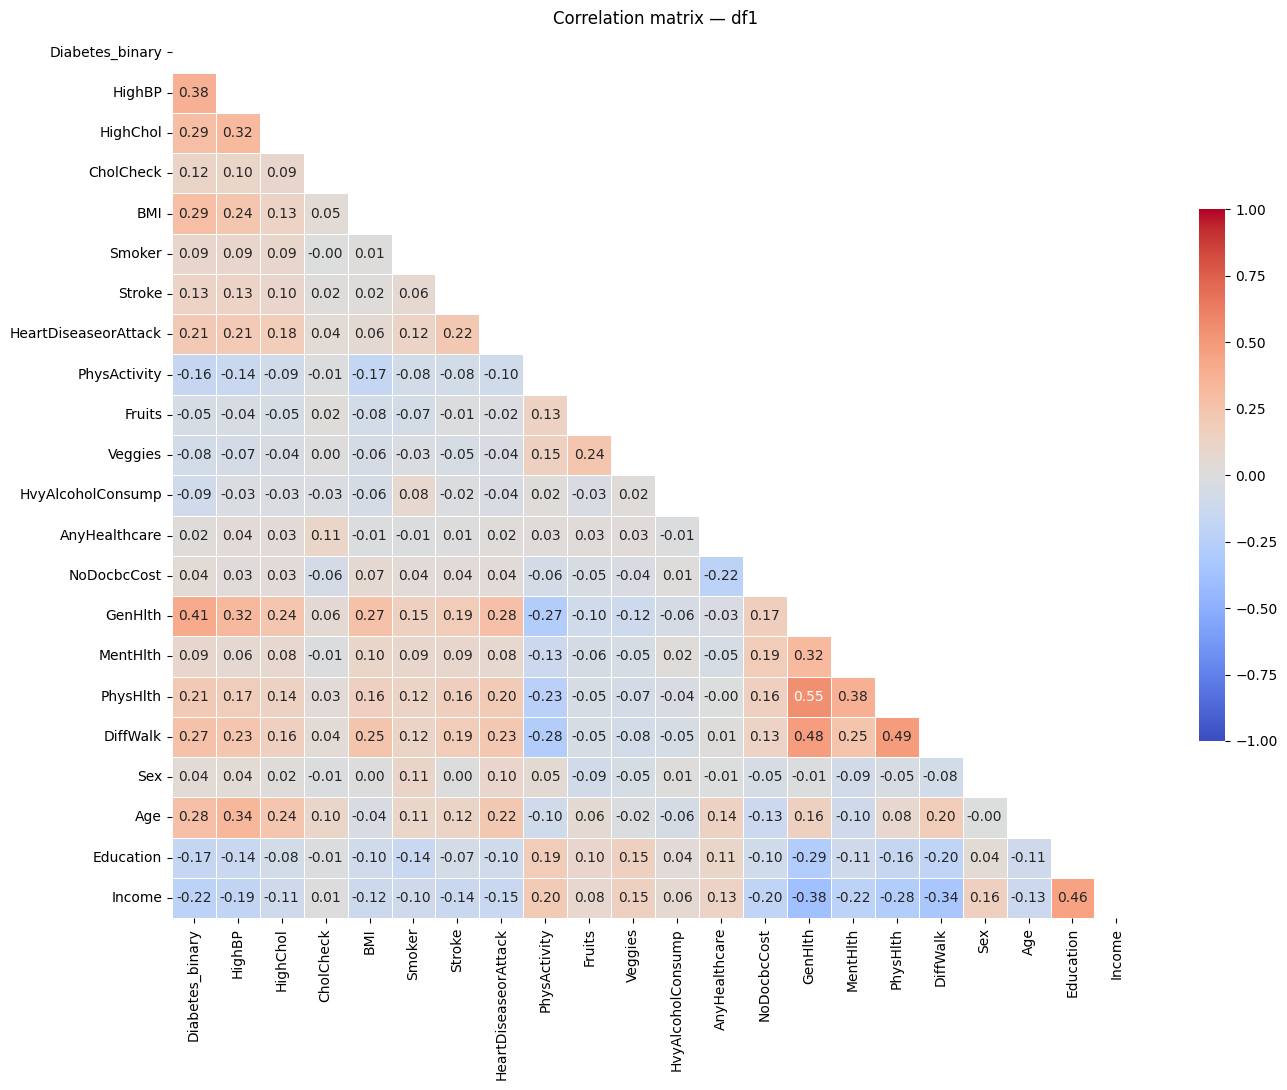

Top positive correlations with 'Diabetes_binary':
 GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382

Top negative correlations with 'Diabetes_binary':
 Income              -0.224449
Education           -0.170481
PhysActivity        -0.158666
HvyAlcoholConsump   -0.094853
Veggies             -0.079293
Fruits              -0.054077
AnyHealthcare        0.023191
NoDocbcCost          0.040977
Sex                  0.044413
Smoker               0.085999


In [11]:
# Correlation matrix and target correlations for df1
corr = df2.corr()

# Heatmap (show upper triangle mask to avoid duplicate values)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 11))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.6}
)
plt.title("Correlation matrix — df1")
plt.tight_layout()
plt.show()

# Print correlations with the target column
target_col = "Diabetes_binary"
if target_col in corr.columns:
    corr_target = corr[target_col].drop(labels=[target_col])
    print("Top positive correlations with '{}':\n".format(target_col), corr_target.sort_values(ascending=False).head(10).to_string())
    print("\nTop negative correlations with '{}':\n".format(target_col), corr_target.sort_values().head(10).to_string())
else:
    print(f"Target column '{target_col}' not found in df1. Available columns:\n{list(df1.columns)}")

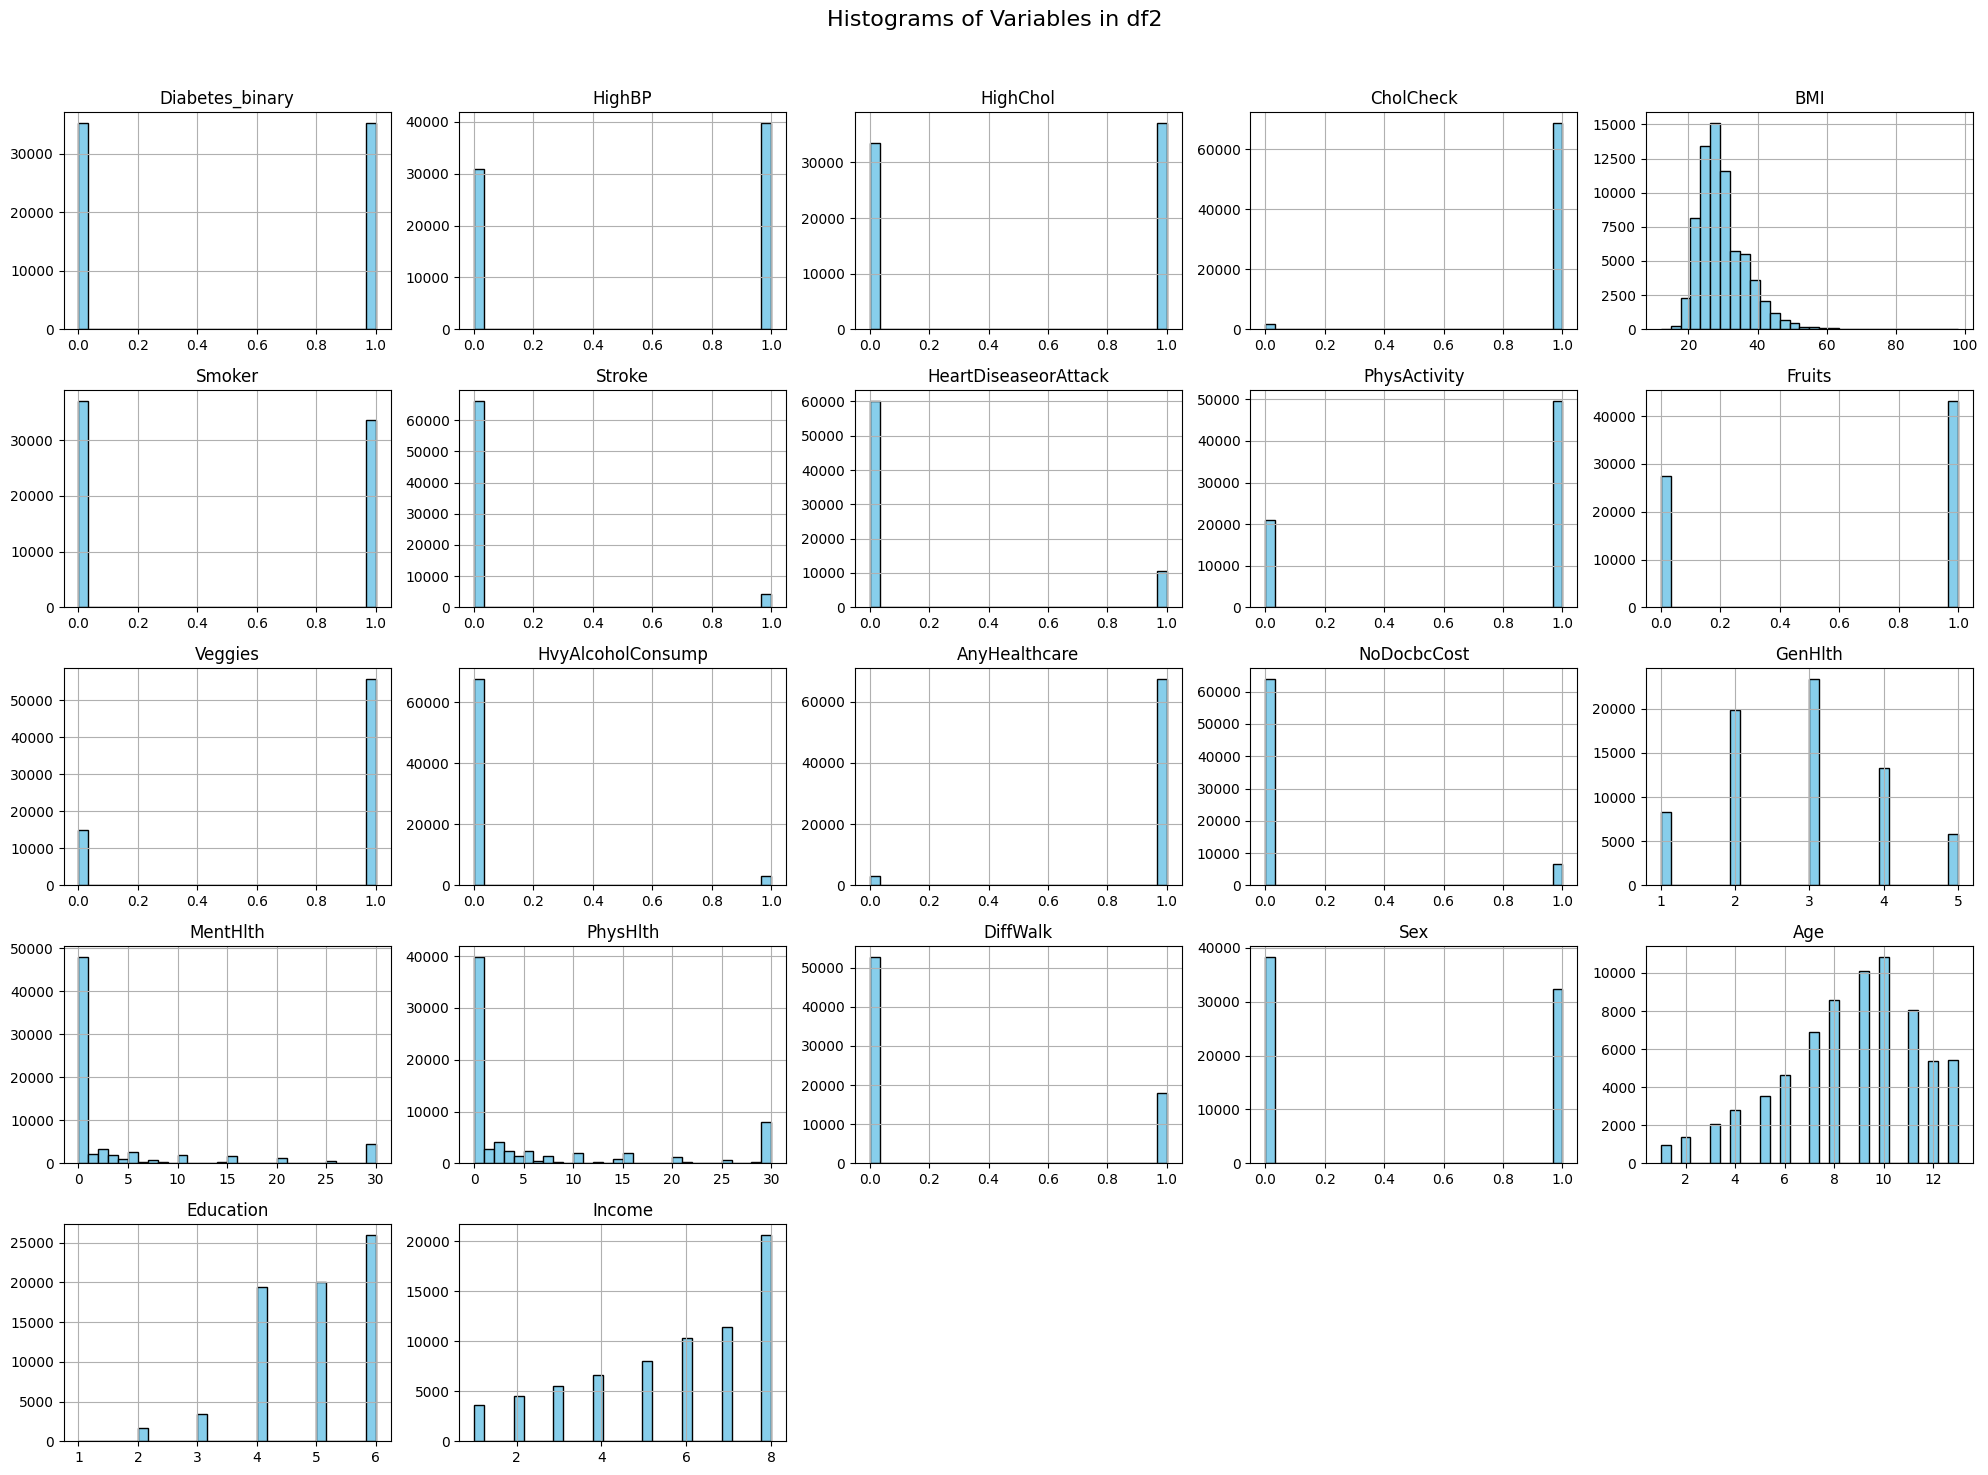

In [ ]:
df2.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Variables in df2", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

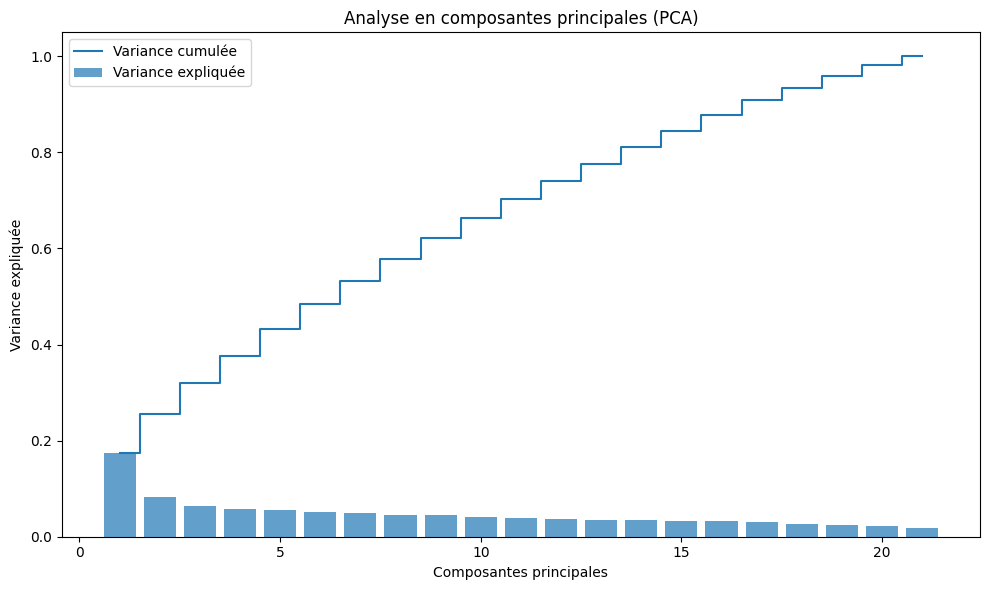

Variance expliquée par chaque composante principale:
Composante 1: 0.1733
Composante 2: 0.0825
Composante 3: 0.0635
Composante 4: 0.0574
Composante 5: 0.0562
Composante 6: 0.0513
Composante 7: 0.0490
Composante 8: 0.0448
Composante 9: 0.0444
Composante 10: 0.0415
Composante 11: 0.0388
Composante 12: 0.0377
Composante 13: 0.0354
Composante 14: 0.0350
Composante 15: 0.0336
Composante 16: 0.0334
Composante 17: 0.0308
Composante 18: 0.0260
Composante 19: 0.0237
Composante 20: 0.0226
Composante 21: 0.0189


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalisation des données
features = df2.drop(columns=[target_col])  # Exclure la variable cible
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application de la PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Variance expliquée')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Analyse en composantes principales (PCA)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Afficher les composantes principales
print("Variance expliquée par chaque composante principale:")
for i, var in enumerate(explained_variance, 1):
    print(f"Composante {i}: {var:.4f}")

Ces résultats montrent la proportion de variance expliquée par chaque composante principale dans l'analyse en composantes principales (PCA). Voici quelques observations :

1. **Composante principale 1** : Elle explique environ **17.33%** de la variance totale, ce qui en fait la composante la plus importante. Cependant, elle n'explique pas une majorité de la variance, ce qui indique que les données sont dispersées sur plusieurs dimensions.

2. **Diminution progressive de la variance expliquée** : Les composantes suivantes expliquent de moins en moins de variance. Par exemple, la composante 2 explique **8.25%**, la composante 3 **6.35%**, et ainsi de suite.

3. **Variance cumulée** : En additionnant les variances expliquées, on peut déterminer combien de composantes sont nécessaires pour expliquer une proportion significative de la variance totale. Par exemple :
    - Les 5 premières composantes expliquent environ **43.3%** de la variance totale.
    - Les 10 premières composantes expliquent environ **64.8%** de la variance totale.

4. **Grand nombre de dimensions nécessaires** : Puisque chaque composante explique une faible proportion de la variance, cela suggère que les données sont relativement complexes et qu'il n'y a pas de forte redondance entre les variables.

5. **Réduction de la dimensionnalité** : Si l'objectif est de réduire la dimensionnalité tout en conservant une grande partie de l'information, il pourrait être judicieux de conserver les premières composantes qui expliquent, par exemple, **80-90%** de la variance.

En résumé, ces résultats indiquent que les données sont multidimensionnelles et qu'une réduction de dimensionnalité nécessiterait de conserver plusieurs composantes pour préserver une part significative de l'information.

### Choix des variables pour les modèles de Machine Learning

À la vue des résultats de l'Analyse en Composantes Principales (PCA), il apparaît que chaque composante principale explique une faible proportion de la variance totale. Cela indique que les données sont dispersées sur plusieurs dimensions et qu'aucune composante unique ou combinaison réduite de composantes ne capture une part significative de l'information.

Par conséquent, nous avons décidé de **conserver toutes les variables** dans leur état initial pour appliquer nos modèles de Machine Learning. Cette approche garantit que l'ensemble des informations disponibles sera utilisé, ce qui est essentiel pour maximiser les performances des modèles et éviter de perdre des relations importantes entre les variables.